In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [12]:
iris = pd.read_csv(r"data_set\iris.csv")
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
110,6.5,3.2,5.1,2.0,virginica
138,6.0,3.0,4.8,1.8,virginica
67,5.8,2.7,4.1,1.0,versicolor
26,5.0,3.4,1.6,0.4,setosa
119,6.0,2.2,5.0,1.5,virginica
107,7.3,2.9,6.3,1.8,virginica
64,5.6,2.9,3.6,1.3,versicolor
92,5.8,2.6,4.0,1.2,versicolor
146,6.3,2.5,5.0,1.9,virginica
113,5.7,2.5,5.0,2.0,virginica


In [13]:
iris = iris.drop("species", axis = 1)
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width
34,4.9,3.1,1.5,0.1
53,5.5,2.3,4.0,1.3
26,5.0,3.4,1.6,0.4
134,6.1,2.6,5.6,1.4
132,6.4,2.8,5.6,2.2
99,5.7,2.8,4.1,1.3
104,6.5,3.0,5.8,2.2
87,6.3,2.3,4.4,1.3
1,4.9,3.0,1.4,0.2
127,6.1,3.0,4.9,1.8


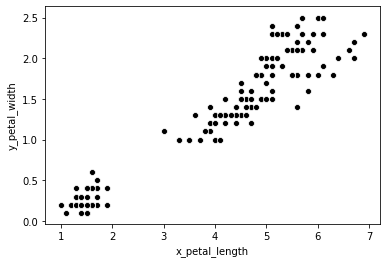

In [14]:
sns.scatterplot(data = iris, x = "petal_length", y= "petal_width", color="black")
plt.xlabel('x_petal_length')
plt.ylabel('y_petal_width')
plt.savefig('2d_data_needing_clustering.png', dpi = 300, bbox_inches = "tight")

In [15]:
class Center():
    def __init__(self, data):
        """generates a random center inside the region bounded by the data"""        
        num_dimensions = data.shape[1]
        self.coordinates = np.array([0.0] * num_dimensions)
        for i in range(num_dimensions):
            min_value = np.min(data[:, i])
            max_value = np.max(data[:, i])            
            random_value = random.uniform(min_value, max_value)            
            self.coordinates[i] = random_value
    
    def __str__(self):
        return str(self.coordinates)

    def __repr__(self):
        return repr(self.coordinates)

    def dist(self, data_point):
        return np.sqrt(np.sum((self.coordinates - data_point)**2, axis = 1))
    
    def dist_sq(self, data_point):
        return np.sum((self.coordinates - data_point)**2, axis = 1)

In [16]:
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)

In [17]:
# force coordinates from the lecture demo
c1.coordinates = np.array([2.52364007, 2.31040024])
c2.coordinates = np.array([6.53276402, 1.211463])

In [18]:
def plot_centers_and_black_data(iris, centers):
    sns.scatterplot(data = iris, x = "petal_length", y= "petal_width", color="black")
    for center in centers:
        plt.plot(center.coordinates[0], center.coordinates[1], '*', markersize = 10)    
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    legend_text = ['c' + str(i) for i in range(1, len(centers) + 1)]
    legend_text.append('data')
    plt.legend(legend_text)

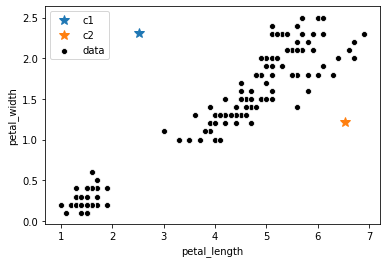

In [19]:
plot_centers_and_black_data(iris, (c1, c2))
plt.savefig('2means_demo_initial_placement.png', dpi = 300, bbox_inches = "tight")

In [20]:
def get_cluster_number(dists):
    return np.where(dists == np.min(dists))[0][0]

In [21]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis = 1)
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,dist1,dist2,cluster
0,5.1,3.5,1.4,0.2,2.390890,5.231474,0
1,4.9,3.0,1.4,0.2,2.390890,5.231474,0
2,4.7,3.2,1.3,0.2,2.439484,5.329623,0
3,4.6,3.1,1.5,0.2,2.345555,5.133398,0
4,5.0,3.6,1.4,0.2,2.390890,5.231474,0
5,5.4,3.9,1.7,0.4,2.080387,4.900416,0
6,4.6,3.4,1.4,0.3,2.303101,5.213064,0
7,5.0,3.4,1.5,0.2,2.345555,5.133398,0
8,4.4,2.9,1.4,0.2,2.390890,5.231474,0
9,4.9,3.1,1.5,0.1,2.435920,5.154034,0


In [22]:
iris["cluster"].value_counts()

0    79
1    71
Name: cluster, dtype: int64

In [23]:
def plot_centers_and_colorized_data(iris, centers):
    current_palette = sns.color_palette()[0:len(centers)]
    sns.scatterplot(data = iris, x = "petal_length", y= "petal_width", hue="cluster", palette=current_palette)  
    for center in centers:
        plt.plot(center.coordinates[0], center.coordinates[1], '*', markersize = 10)
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    legend_text = ['c' + str(i) for i in range(1, len(centers) + 1)]
    plt.legend(legend_text)

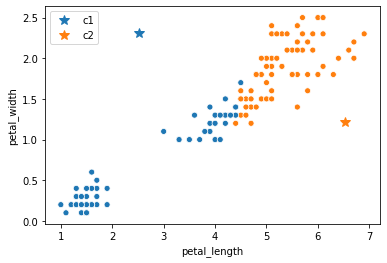

In [24]:
plot_centers_and_colorized_data(iris, (c1, c2))
plt.savefig('2means_demo_initial_placement_colored.png', dpi = 300, bbox_inches = "tight")

In [25]:
average_c1_length = np.mean(iris[iris["cluster"] == 0])["petal_length"]
average_c1_width = np.mean(iris[iris["cluster"] == 0])["petal_width"]
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1])["petal_length"]
average_c2_width = np.mean(iris[iris["cluster"] == 1])["petal_width"]
c2.coordinates = (average_c2_length, average_c2_width)

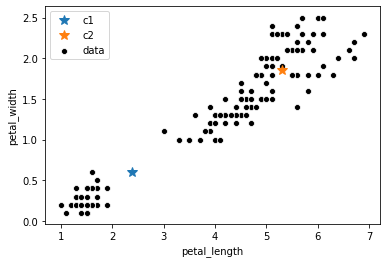

In [26]:
plot_centers_and_black_data(iris, (c1, c2))
plt.savefig('2means_demo_center_position_2.png', dpi = 300, bbox_inches = "tight")

In [27]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis = 1)

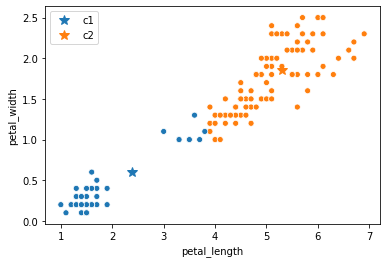

In [28]:
plot_centers_and_colorized_data(iris, (c1, c2))
plt.savefig('2means_demo_center_position_2_colorized.png', dpi = 300, bbox_inches = "tight")

In [29]:
average_c1_length = np.mean(iris[iris["cluster"] == 0])["petal_length"]
average_c1_width = np.mean(iris[iris["cluster"] == 0])["petal_width"]
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1])["petal_length"]
average_c2_width = np.mean(iris[iris["cluster"] == 1])["petal_width"]
c2.coordinates = (average_c2_length, average_c2_width)

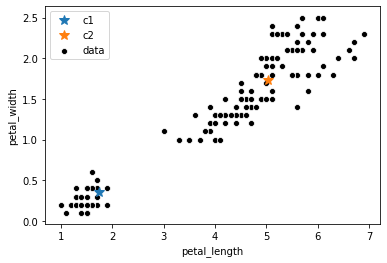

In [30]:
plot_centers_and_black_data(iris, (c1, c2))
plt.savefig('2means_demo_center_position_3.png', dpi = 300, bbox_inches = "tight")

In [31]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis = 1)

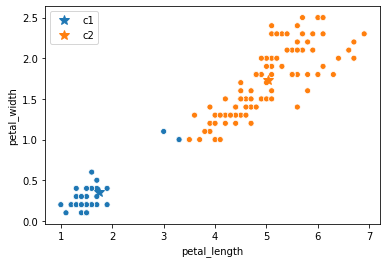

In [32]:
plot_centers_and_colorized_data(iris, (c1, c2))
plt.savefig('2means_demo_center_position_3_colorized.png', dpi = 300, bbox_inches = "tight")

In [33]:
average_c1_length = np.mean(iris[iris["cluster"] == 0])["petal_length"]
average_c1_width = np.mean(iris[iris["cluster"] == 0])["petal_width"]
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1])["petal_length"]
average_c2_width = np.mean(iris[iris["cluster"] == 1])["petal_width"]
c2.coordinates = (average_c2_length, average_c2_width)

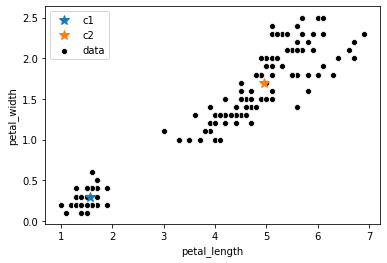

In [34]:
plot_centers_and_black_data(iris, (c1, c2))
plt.savefig('2means_demo_center_position_4.png', dpi = 300, bbox_inches = "tight")

In [35]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis = 1)

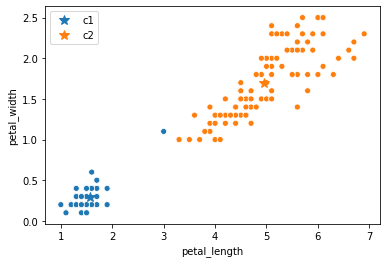

In [36]:
plot_centers_and_colorized_data(iris, (c1, c2))
plt.savefig('2means_demo_center_position_4_colorized.png', dpi = 300, bbox_inches = "tight")

In [37]:
average_c1_length = np.mean(iris[iris["cluster"] == 0])["petal_length"]
average_c1_width = np.mean(iris[iris["cluster"] == 0])["petal_width"]
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1])["petal_length"]
average_c2_width = np.mean(iris[iris["cluster"] == 1])["petal_width"]
c2.coordinates = (average_c2_length, average_c2_width)

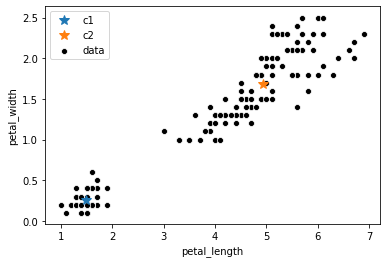

In [38]:
plot_centers_and_black_data(iris, (c1, c2))
plt.savefig('2means_demo_center_position_5.png', dpi = 300, bbox_inches = "tight")

In [39]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis = 1)

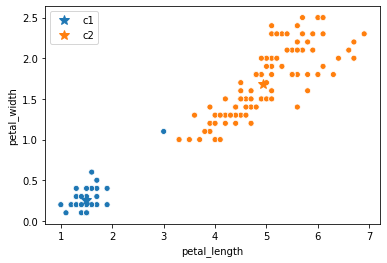

In [40]:
plot_centers_and_colorized_data(iris, (c1, c2))
plt.savefig('2means_demo_center_position_5_colorized.png', dpi = 300, bbox_inches = "tight")

### Example for K > 2

In [41]:
import copy
def compute_centers_after_N_iterations(data, column_names, centers, N):
    centers = copy.deepcopy(centers)
    
    for i in range(N):
        #recompute clusters        
        dist_names = []
        for center_num in range(len(centers)):        
            data["dist" + str(center_num)] = centers[center_num].dist(data[column_names])
            dist_names.append("dist" + str(center_num))
        
        data["cluster"] = data[dist_names].apply(get_cluster_number, axis = 1)    
        
        #update centers
        for center_num in range(len(centers)):
            for col_num in range(len(column_names)):
                col_name = column_names[col_num]
    
                centers[center_num].coordinates[col_num] = np.mean(data[data["cluster"] == center_num])[col_name]

    return centers


In [42]:
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c1.coordinates = np.array([2.52364007, 2.31040024])
c2.coordinates = np.array([6.53276402, 1.211463])

In [43]:
iris

,sepal_length,sepal_width,petal_length,petal_width,dist1,dist2,cluster
0,5.1,3.5,1.4,0.2,0.112040,3.824028,0
1,4.9,3.0,1.4,0.2,0.112040,3.824028,0
2,4.7,3.2,1.3,0.2,0.203412,3.916407,0
3,4.6,3.1,1.5,0.2,0.061068,3.732042,0
4,5.0,3.6,1.4,0.2,0.112040,3.824028,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4.229889,0.676487,1
146,6.3,2.5,5.0,1.9,3.870173,0.230631,1
147,6.5,3.0,5.2,2.0,4.093707,0.420388,1
148,6.2,3.4,5.4,2.3,4.406168,0.779445,1


In [44]:
def inertia(data, centers):
    total_inertia = 0
    for center_num in range(len(centers)):
        data_in_this_cluster = data[data["cluster"] == center_num]        
        total_inertia += np.sum(centers[center_num].dist(data_in_this_cluster[["petal_length", "petal_width"]]))
    return total_inertia

In [45]:
def distortion(data, centers):
    total_distortion = 0
    for center_num in range(len(centers)):
        data_in_this_cluster = data[data["cluster"] == center_num]        
        total_distortion += np.sum(centers[center_num].dist(data_in_this_cluster[["petal_length", "petal_width"]]))/len(data_in_this_cluster)
    return total_distortion

inertia: 44.95723374524917, distortion: 1.254497095901379)


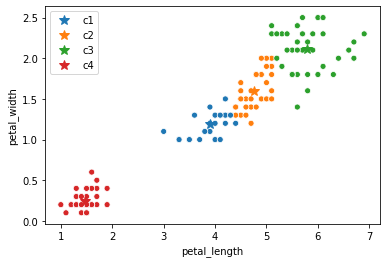

In [46]:
random.seed(25)
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c3 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c4 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
new_centers = compute_centers_after_N_iterations(iris, ['petal_length', 'petal_width'], [c1, c2, c3, c4], 12)
print(f"inertia: {inertia(iris, new_centers)}, distortion: {distortion(iris, new_centers)})")
plot_centers_and_colorized_data(iris, new_centers)
plt.savefig("k4_example1.png", bbox_inches = "tight", dpi=300)

inertia: 45.94868633864745, distortion: 1.3083110705058751)


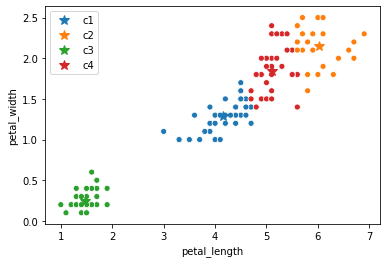

In [47]:
random.seed(29)
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c3 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c4 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
new_centers = compute_centers_after_N_iterations(iris, ['petal_length', 'petal_width'], [c1, c2, c3, c4], 12)
print(f"inertia: {inertia(iris, new_centers)}, distortion: {distortion(iris, new_centers)})")
plot_centers_and_colorized_data(iris, new_centers)
plt.savefig("k4_example2.png", bbox_inches = "tight", dpi=300)

inertia: 54.34774261570242, distortion: 1.50090424867691)


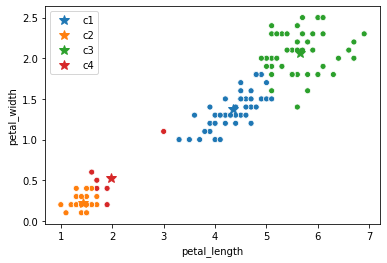

In [48]:
random.seed(40)
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c3 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c4 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
new_centers = compute_centers_after_N_iterations(iris, ['petal_length', 'petal_width'], [c1, c2, c3, c4], 12)
print(f"inertia: {inertia(iris, new_centers)}, distortion: {distortion(iris, new_centers)})")
plot_centers_and_colorized_data(iris, new_centers)
plt.savefig("k4_example3.png", bbox_inches = "tight", dpi=300)

inertia: 44.95723374524917, distortion: 1.254497095901379)


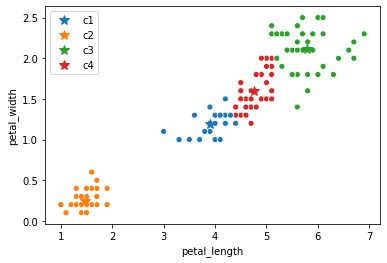

In [49]:
random.seed(75)
c1 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c3 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
c4 = Center(iris.loc[:, ['petal_length', 'petal_width']].values)
new_centers = compute_centers_after_N_iterations(iris, ['petal_length', 'petal_width'], [c1, c2, c3, c4], 12)
print(f"inertia: {inertia(iris, new_centers)}, distortion: {distortion(iris, new_centers)})")
plot_centers_and_colorized_data(iris, new_centers)
plt.savefig("k4_example4.png", bbox_inches = "tight", dpi=300)

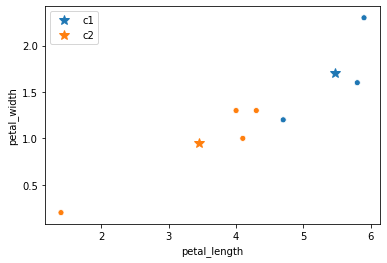

In [51]:
random.seed(20)
np.random.seed(20)
iris_small = iris.sample(7)
c1 = Center(iris_small.loc[:, ['petal_length', 'petal_width']].values)
c2 = Center(iris_small.loc[:, ['petal_length', 'petal_width']].values)
new_centers2 = compute_centers_after_N_iterations(iris_small, ['petal_length', 'petal_width'], [c1, c2], 12)
plot_centers_and_colorized_data(iris_small, new_centers2)
plt.savefig("distortion_computation.png", dpi = 300, bbox_inches = "tight")

In [52]:
def print_distances_squared(data, centers):
    for center_num in range(len(centers)):
        data_in_this_cluster = data[data["cluster"] == center_num]        
        print(centers[center_num].dist(data_in_this_cluster[["petal_length", "petal_width"]])**2)

print_distances_squared(iris_small, new_centers2)

73     0.837778
129    0.121111
143    0.547778
dtype: float64
47    4.765
74    0.845
67    0.425
89    0.425
dtype: float64


In [53]:
inertia(iris_small, new_centers2)

6.409399633729917

In [54]:
distortion(iris_small, new_centers2)

1.7693026035868602

In [55]:
iris_small

,sepal_length,sepal_width,petal_length,petal_width,dist1,dist2,cluster,dist0,dist3
47,4.6,3.2,1.4,0.2,2.182888,4.783274,1,4.334487,3.637045
73,6.1,2.8,4.7,1.2,1.274755,1.415877,0,0.915302,0.401564
74,6.4,2.9,4.3,1.3,0.919239,1.691724,1,1.233333,0.545981
129,7.2,3.0,5.8,1.6,2.438237,0.508523,0,0.348010,1.042109
67,5.8,2.7,4.1,1.0,0.651920,2.017764,1,1.535506,0.888636
89,5.5,2.5,4.0,1.3,0.651920,1.960509,1,1.520234,0.814145
143,6.8,3.2,5.9,2.3,2.797320,0.222950,0,0.740120,1.340931


### Example of Distortion Failing to Match Intuition

In [56]:
c1.coordinates = [1.2, 0.15]
c2.coordinates = [4.906000000000001, 1.6760000000000006]
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis = 1)

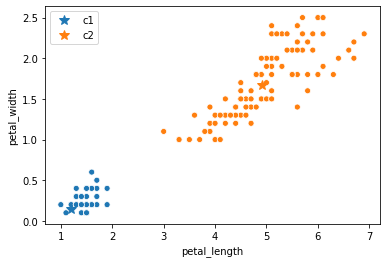

In [57]:
plot_centers_and_colorized_data(iris, (c1, c2))
plt.savefig("intuitive_clustering.png", dpi=300, bbox_inches = "tight")

In [58]:
print(f"inertia: {inertia(iris, [c1, c2])}, distortion: {distortion(iris, [c1, c2])})")

inertia: 94.41444765828233, distortion: 1.0979144373055645)


In [59]:
average_c1_length = np.mean(iris[iris["cluster"] == 0])["petal_length"]
average_c1_width = np.mean(iris[iris["cluster"] == 0])["petal_width"]
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(iris[iris["cluster"] == 1])["petal_length"]
average_c2_width = np.mean(iris[iris["cluster"] == 1])["petal_width"]
c2.coordinates = (average_c2_length, average_c2_width)

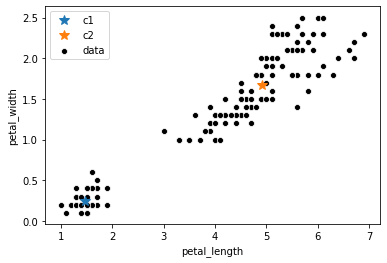

In [60]:
plot_centers_and_black_data(iris, (c1, c2))

In [61]:
iris["dist1"] = c1.dist(iris[["petal_length", "petal_width"]])
iris["dist2"] = c2.dist(iris[["petal_length", "petal_width"]])
iris["cluster"] = iris[["dist1", "dist2"]].apply(get_cluster_number, axis = 1)

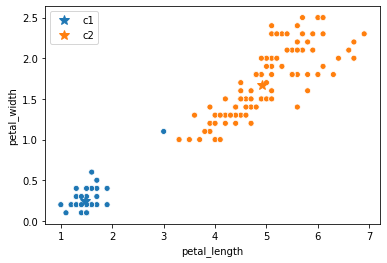

In [62]:
plot_centers_and_colorized_data(iris, (c1, c2))

In [63]:
print(f"inertia: {inertia(iris, [c1, c2])}, distortion: {distortion(iris, [c1, c2])})")

inertia: 87.28316581620376, distortion: 0.9789681402782842)


### Agglomerative Clustering

In [64]:
random.seed(42)
np.random.seed(42)
iris_small = iris.sample(13).loc[:, 'sepal_length':'petal_width'].reset_index(drop=True)
iris_small = iris_small.drop(8).reset_index(drop=True)

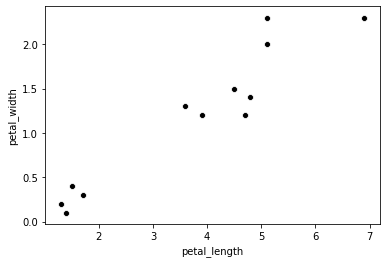

In [65]:
sns.scatterplot(data = iris_small, x = "petal_length", y= "petal_width", color="black")

In [66]:
iris_small["cluster"] = np.array(range(0, len(iris_small)))

In [67]:
iris_small

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,6.1,2.8,4.7,1.2,0
1,5.7,3.8,1.7,0.3,1
2,7.7,2.6,6.9,2.3,2
3,6.0,2.9,4.5,1.5,3
4,6.8,2.8,4.8,1.4,4
5,5.4,3.4,1.5,0.4,5
6,5.6,2.9,3.6,1.3,6
7,6.9,3.1,5.1,2.3,7
8,5.8,2.7,3.9,1.2,8
9,6.5,3.2,5.1,2.0,9


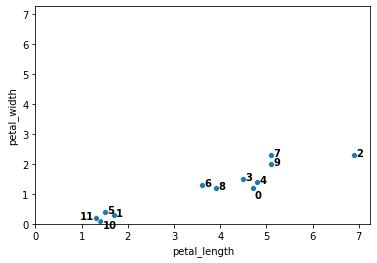

In [68]:
def text_location(data, line):
    xloc = data["petal_length"][line] + 0.05
    yloc = data["petal_width"][line] - 0.03
    if line == 10:
        yloc = yloc - 0.2
    if line == 11 and data["cluster"][line] == 11:
        xloc = xloc - 0.4
    if line == 11 and data["cluster"][line] != 11:
        xloc = xloc - 0.25
    if line == 0:
        yloc = yloc - 0.3
    return xloc, yloc

def plot_clusters(data):
    p1 = sns.scatterplot(data = data, x = "petal_length", y= "petal_width")
    for line in range(0, data.shape[0]):         
         xloc, yloc = text_location(data, line) 
         p1.text(xloc, yloc,                    
         str(data["cluster"][line]), horizontalalignment='left', 
         size='medium', color='black', weight='semibold')
    plt.xlim(0, 7.25)
    plt.ylim(0, 7.25)
            
plot_clusters(iris_small)
plt.savefig("agglomerative_start.png", dpi=300, bbox_inches = "tight")

In [69]:
from scipy.spatial import distance

def dist_between_clusters(data, cnum1, cnum2):
    cluster1 = data[data["cluster"] == cnum1]
    cluster2 = data[data["cluster"] == cnum2]    
    return distance.cdist(cluster1[["petal_length", "petal_width"]], cluster2[["petal_length", "petal_width"]]).min()

In [70]:
def closest_clusters(data):
    cluster_values = data["cluster"].unique()
    smallest_distance = float("inf")
    best_pair = [-1, -1]
    for cnum1 in cluster_values:
        for cnum2 in cluster_values:
            if cnum1 == cnum2:
                continue
            cur_dist = dist_between_clusters(data, cnum1, cnum2)
            if cur_dist < smallest_distance:
                best_pair = [cnum1, cnum2]
                smallest_distance = cur_dist
                
    return best_pair

In [71]:
def merge_clusters(data, cnum1, cnum2):
    data.loc[data["cluster"] == cnum2, "cluster"] = cnum1

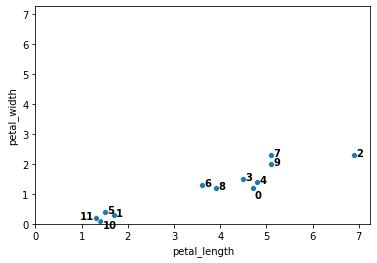

In [73]:
plot_clusters(iris_small)
plt.xlim(0, 7.25)
plt.ylim(0, 7.25)
plt.savefig(f"agglomerative_start.png", dpi=300, bbox_inches = "tight")

In [74]:
i = 0
while len(iris_small["cluster"].unique()) != 2:
    i += 1
    cnum1, cnum2 = closest_clusters(iris_small)
    merge_clusters(iris_small, cnum1, cnum2)
    plot_clusters(iris_small)
    plt.savefig(f"agglomerative_merge{i}.png", dpi=300, bbox_inches = "tight")
    plt.clf()

<Figure size 432x288 with 0 Axes>

## Run on full dataset

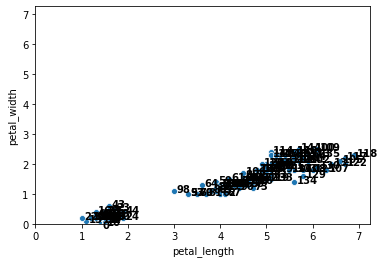

In [75]:
iris_small = iris.copy()
iris_small["cluster"] = np.array(range(0, len(iris_small)))
plot_clusters(iris_small)

In [65]:
#my code is too slow
#i = 0
#while len(iris_small["cluster"].unique()) != 2:
#    i += 1
#    print(i)
#    cnum1, cnum2 = closest_clusters(iris_small)
#    merge_clusters(iris_small, cnum1, cnum2)
    #plot_clusters(iris_small)
    #plt.savefig(f"agglomerative_merge{i}.png", dpi=300, bbox_inches = "tight")
    #plt.clf()

In [76]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(iris[["petal_length", "petal_width"]])

In [77]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [78]:
iris["cluster"] = clustering.labels_

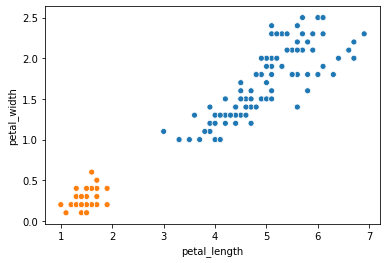

In [79]:
sns.scatterplot(data = iris, x = "petal_length", y= "petal_width", hue ="cluster", legend = None)
plt.savefig("agglomerative_output.png", dpi = 300, bbox_inches = "tight")

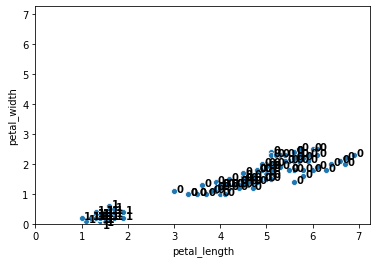

In [80]:
plot_clusters(iris)
plt.savefig("agglomerative_output_numbers.png", dpi = 300, bbox_inches = "tight")

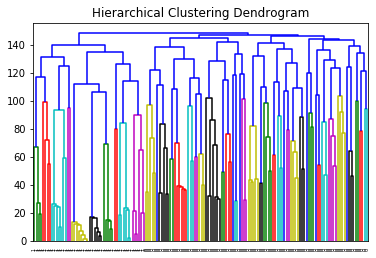

In [81]:
#from https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_)
plt.savefig("dendrogram.png", bbox_inches = "tight", dpi = 300)

### Elbow Method

In [82]:
from sklearn.cluster import KMeans 
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
X = iris[["petal_length", "petal_width"]]
    
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X)     
      
    distortions.append(sum(np.min(distance.cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(distance.cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

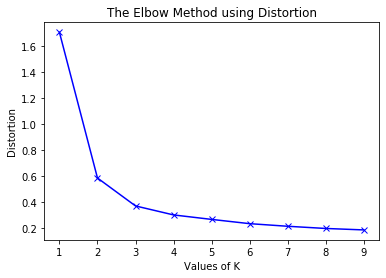

In [83]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.savefig("elbow.png", dpi=300, bbox_inches = "tight")

### Silhouette Scores

In [84]:
X.query("petal_length < 3.2 and petal_length > 2")

,petal_length,petal_width
98,3.0,1.1


For n_clusters = 2 The average silhouette_score is : 0.6571856448729174


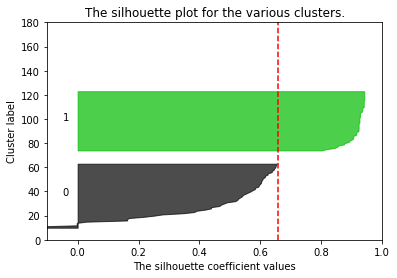

In [91]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

n_clusters = 2
fig, ax1 = plt.subplots(1, 1)
#fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

cluster_labels = clustering.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.savefig("silhoutte_plot.png", dpi=300, bbox_inches = "tight")

In [92]:
min(sample_silhouette_values)

-0.14062817006789843

For n_clusters = 3 The average silhouette_score is : 0.6571856448729174


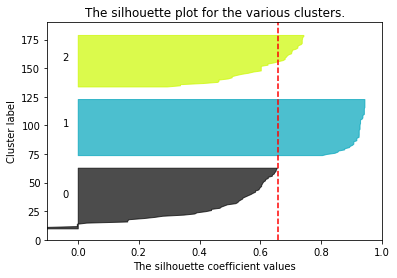

In [93]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 3).fit(iris[["petal_length", "petal_width"]])

n_clusters = 3
fig, ax1 = plt.subplots(1, 1)
#fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

cluster_labels = clustering.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.savefig("silhoutte_plot_k3.png", dpi=300, bbox_inches = "tight")

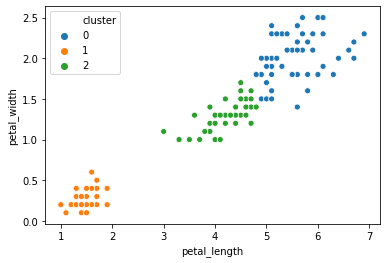

In [94]:
iris["cluster"] = cluster_labels
current_palette = sns.color_palette()[0:3]
sns.scatterplot(data = iris, x = "petal_length", y= "petal_width", hue="cluster", palette = current_palette)
plt.savefig("iris_3_class_agglomerative.png", dpi = 300, bbox_inches = "tight")